<a href="https://colab.research.google.com/github/Gabrielamb2/MachineLearning/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Integrantes: Ellen Shen, Gabriela Boriero, Gabriella Cukier e Samuel Porto

Esse notebok é referente ao projeto final de Machine Learning o qual utiliza o dataset encontrado no link: https://www.kaggle.com/datasets/brsdincer/marine-microplastic-on-world-density-noaa.
Para utilizar esse notebook, basta baixar o dataset e copiar a pasta *MICROPLASTIC_DATA_BASED_ON_LAT_LONG* no mesmo diretório do jupyter notebook.

# Entendendo o problema

# Inicializando o código

## Import

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.colors import ListedColormap
import geopandas as gpd 
import folium
from folium.plugins import MarkerCluster,HeatMap,HeatMapWithTime
import branca.colormap as colormap
from collections import defaultdict

## Fixar a semente do gerador de números aleatórios, para ter reproducibilidade neste notebook.

In [18]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Funções

In [19]:
def format_date(df):
    df['Date'] =pd.to_datetime(df['Date'],errors='coerce')
    df['year'] = df['Date'].dt.year
    return df


In [20]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    


def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plot1=dataframe[feature].hist(bins=50,ax=ax,color='turquoise', alpha=0.5)
        verticalLine(plot1, dataframe[feature].mean(), 5, "blue", "Mean")
        verticalLine(plot1, dataframe[feature].median(), 2, "indigo", "Median")
        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

In [21]:
def timeseries_map_visualization(df):

    start_loc= (np.mean(df['Latitude']),np.mean(df['Longitude']))

    terrain_map=folium.Map(location=start_loc,
                  zoom_start=2,
                  tiles='Stamen Terrain')

    data_dict= defaultdict(list)

    for row in df.itertuples():
        data_dict[row.Date.month].append([row.Latitude,row.Longitude,row.Pieces_KM2])

    heatmap=HeatMapWithTime(data=list(data_dict.values()),
                    index=list(data_dict.keys()),
                    radius=10,
                    min_opacity=0.1,
                    max_opacity=0.6,
                    auto_play=True,
                   control=True,
                    show=True).add_to(terrain_map)

    return terrain_map


# Carregando dados

In [22]:
microplastics_path = "MICROPLASTIC_DATA_BASED_ON_LAT_LONG/"
microplastics_path_adv = microplastics_path+ "ADVENTURE_MICRO_FROM_SCIENTIST.csv"
microplastics_path_geo = microplastics_path+ "GEOMARINE_MICRO.csv"
microplastics_path_sea = microplastics_path+ "SEA_MICRO.csv"

In [23]:
df_microplatic_adv = pd.read_csv(microplastics_path_adv)
df_microplatic_geo = pd.read_csv(microplastics_path_geo)
df_microplatic_sea = pd.read_csv(microplastics_path_sea)

# Entendendo inicialmente os dados

In [24]:
df_microplatic_adv.head(5).transpose()

,0,1,2,3,4
Date,1970-01-01,1970-01-01,1970-01-01,1970-01-01,2013-07-01
Latitude,63.22161,63.47081,65.61092,9.95853,59.378683
Longitude,-41.40596,-41.93471,-37.64574,-84.89108,-153.520867
Total_Pieces_L,3,0,1,9,1
Normalized,0.009288,0.0,0.003096,0.027864,0.003096


In [25]:
df_microplatic_geo.head(5).transpose()

,0,1,2,3,4
Date,2017-10-01,2017-10-01,2017-10-01,2017-10-23,2017-10-25
Latitude,38.335844,36.796376,36.707197,36.116504,35.39275
Longitude,-9.250058,-7.944142,-2.737703,-4.254036,-12.180278
MP_conc__particles_cubic_metre_,180,307,280,212,63
Normalized,0.515759,0.879656,0.802292,0.60745,0.180516


In [26]:
df_microplatic_sea.head(5).transpose()

,0,1,2,3,4
Date,1986-10-15,1986-10-16,1986-10-18,1986-10-19,1986-10-21
Latitude,40.62,39.67,36.45,35.48,30.97
Longitude,-70.07,-69.43,-64.88,-63.7,-60.68
Pieces_KM2,0,0,3597,3597,17989


In [27]:
format_date(df_microplatic_sea)
format_date(df_microplatic_adv)

,Date,Latitude,Longitude,Total_Pieces_L,Normalized,year
0,1970-01-01,63.221610,-41.405960,3,0.009288,1970
1,1970-01-01,63.470810,-41.934710,0,0.000000,1970
2,1970-01-01,65.610920,-37.645740,1,0.003096,1970
3,1970-01-01,9.958530,-84.891080,9,0.027864,1970
4,2013-07-01,59.378683,-153.520867,1,0.003096,2013
...,...,...,...,...,...,...
1388,2017-03-26,-54.780060,-64.408360,20,0.061920,2017
1389,2017-03-27,-54.779895,-64.055666,5,0.015480,2017
1390,2017-03-27,-54.776712,-64.048786,3,0.009288,2017
1391,2017-03-29,-52.972346,-60.037062,2,0.006192,2017


In [28]:
num_microplatic_sea = df_microplatic_sea.columns.drop('Date')
num_microplatic_sea

Index(['Latitude', 'Longitude', 'Pieces_KM2', 'year'], dtype='object')

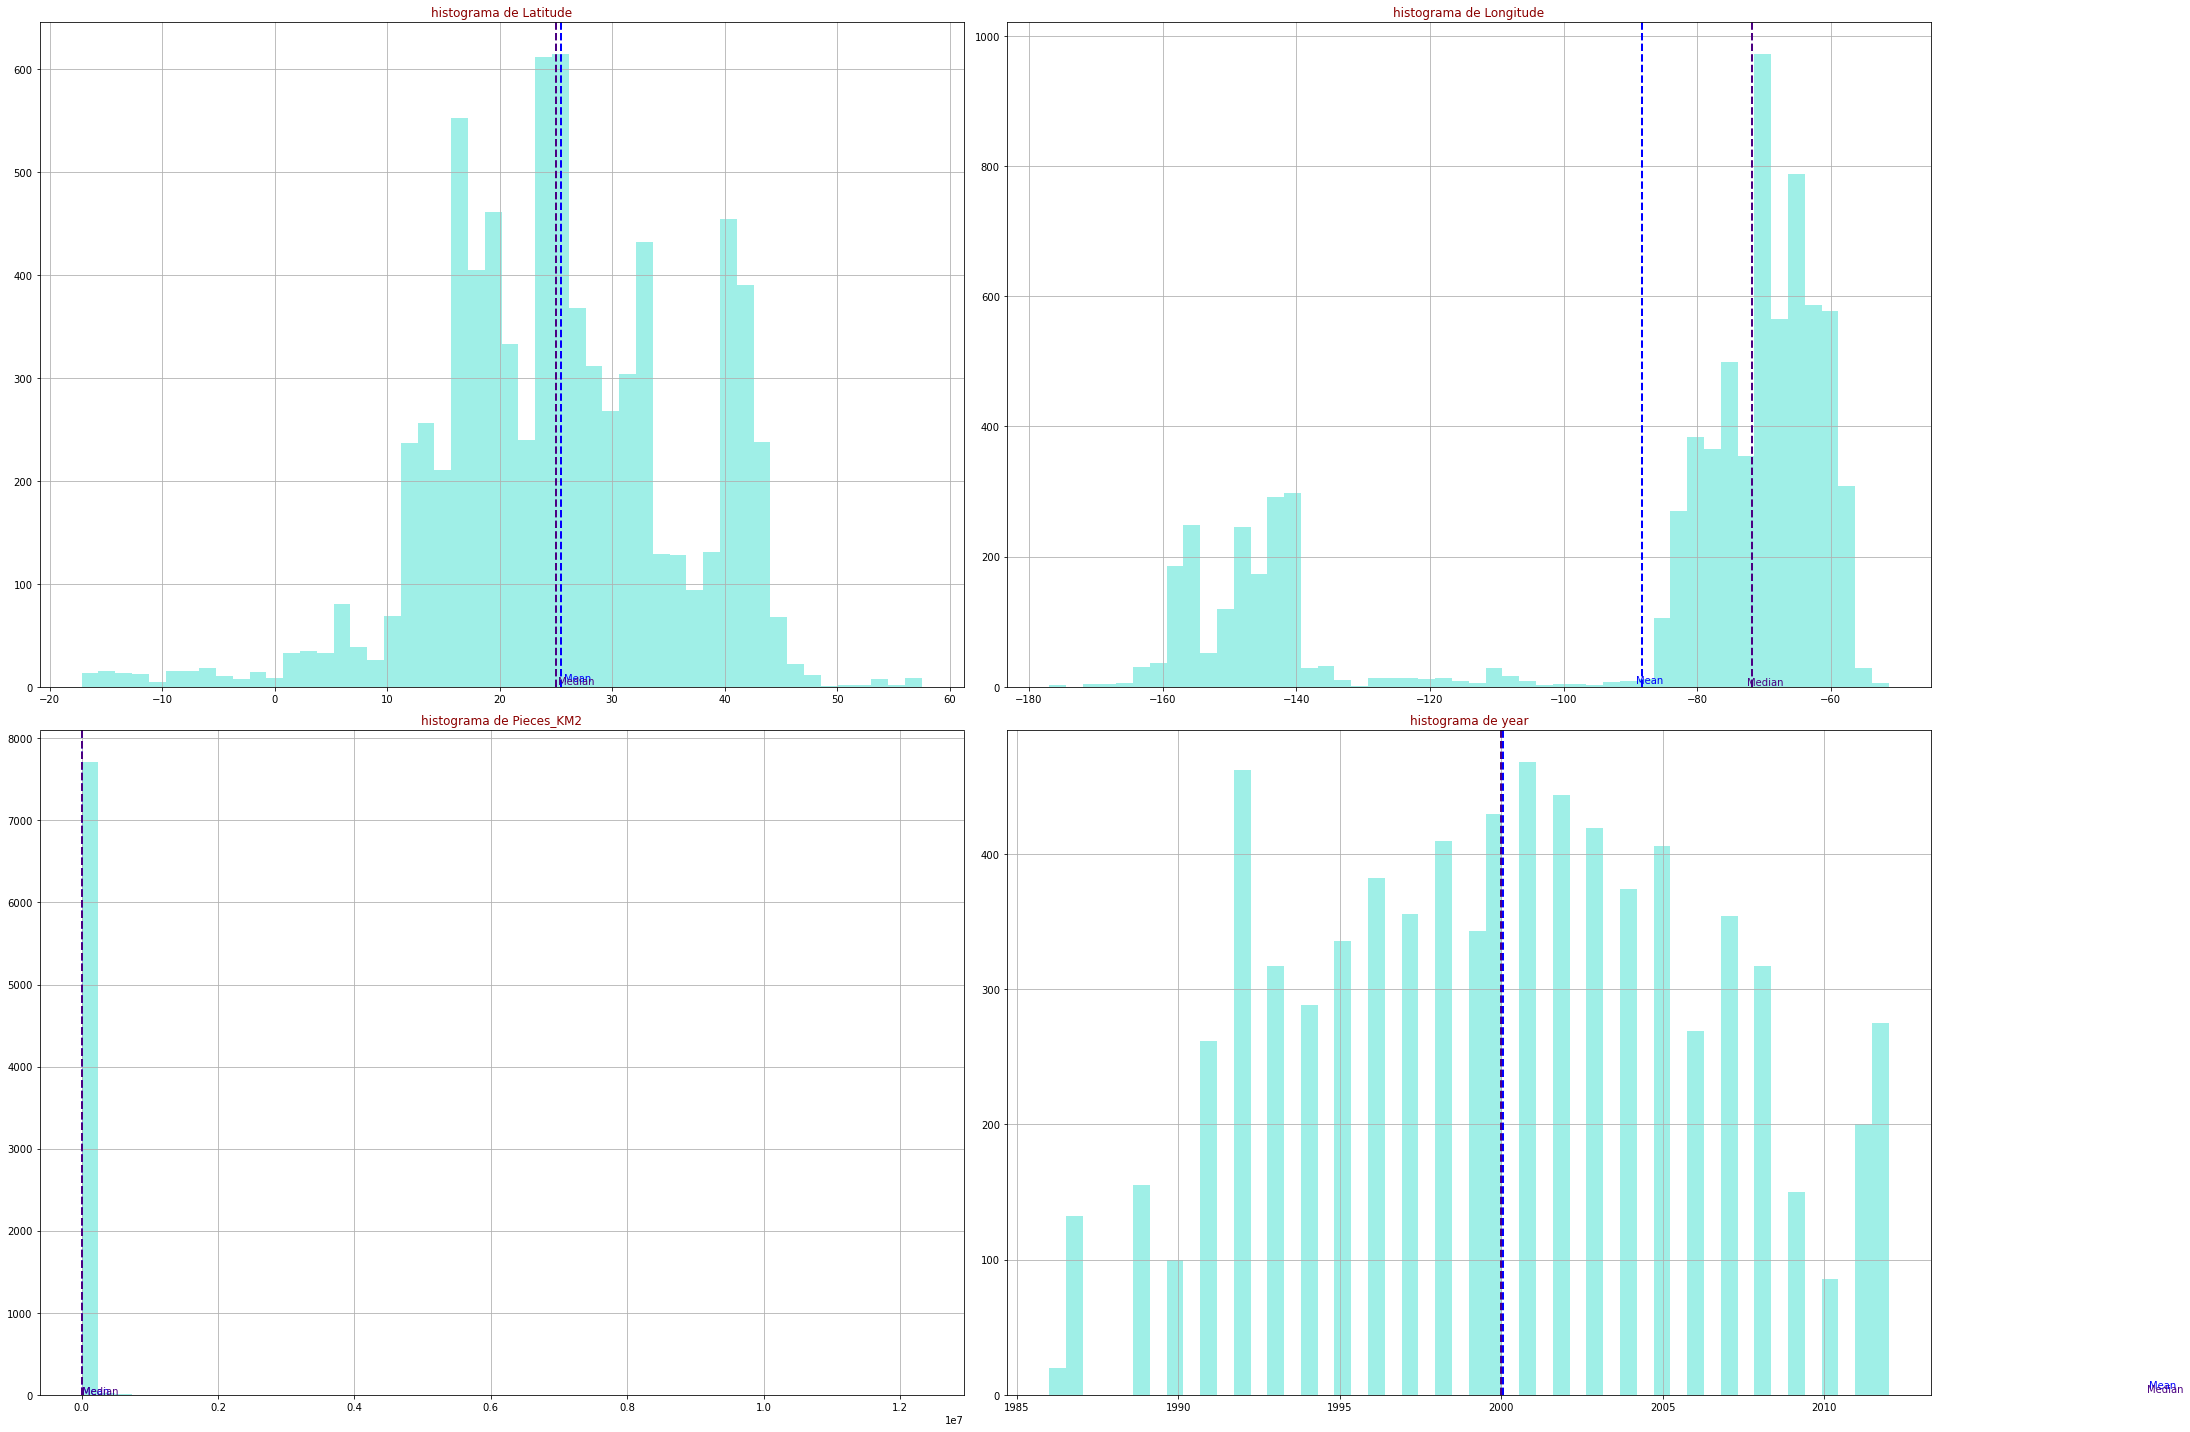

In [29]:
draw_histograms(df_microplatic_sea,num_microplatic_sea,2,2)

No handles with labels found to put in legend.


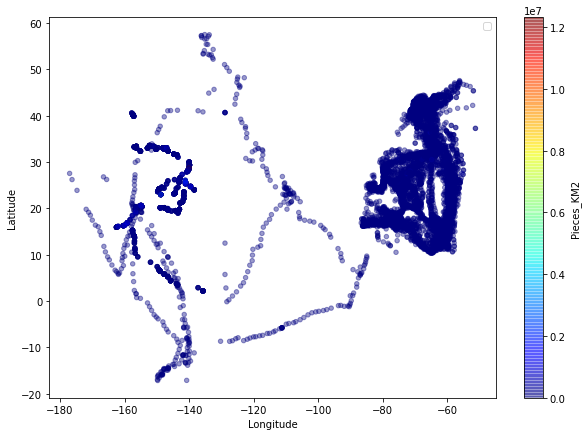

In [30]:
df_microplatic_sea.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
#     s="Normalized",
    c='Pieces_KM2',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
    figsize=(10, 7),
    alpha=0.4,
    sharex=False,
)
plt.legend()
plt.show()

In [31]:
terrain_map = timeseries_map_visualization(df_microplatic_sea)
terrain_map

# Dividindo os dados em conjunto de treinamento e de testes